In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('../clean-data/final-final-df.csv')

In [3]:
data

,id,host_id,host_since,host_location,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighborhood,...,price,number_of_reviews,review_scores_value,calculated_host_listings_count,city,amenities_count,neighborhood_city,full_time_host,host_verifications_clean,essential_amenities
0,772438920837360569,382318476,2020-12-30,Unknown,t,1.0,3.0,t,t,Southwest Ranches,...,500.0,2,5.00,1,Broward County,14,Southwest Ranches Broward County,f,ep,3
1,33271346,118856968,2017-03-02,Fort Lauderdale FL,f,1.0,12.0,t,f,Pompano Beach,...,186.0,129,4.68,3,Broward County,22,Pompano Beach Broward County,f,pw,4
2,484515,637272,2011-05-28,Buenos Aires Argentina,f,1.0,20.0,t,t,Hollywood,...,297.0,27,4.44,6,Broward County,17,Hollywood Broward County,f,ep,3
3,45990221,365280298,2020-08-31,Irvine CA,f,1.0,5.0,t,f,Pompano Beach,...,162.0,162,4.64,5,Broward County,69,Pompano Beach Broward County,f,ep,5
4,48030650,131978491,2017-05-25,Miami FL,f,1.0,17.0,t,t,Pompano Beach,...,92.0,36,4.83,15,Broward County,17,Pompano Beach Broward County,f,ep,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184979,848982732370093638,107434423,2016-12-16,New York NY,f,4807.0,5358.0,t,t,Edgewater,...,95.0,0,NaN,658,Chicago,29,Edgewater Chicago,t,epw,5
184980,849181288802249186,31669178,2015-04-21,Chicago IL,t,14.0,18.0,t,t,Rogers Park,...,107.0,0,NaN,13,Chicago,4,Rogers Park Chicago,t,ep,2
184981,849355136099814004,165881852,2018-01-04,Chicago IL,f,1.0,1.0,t,f,Lake View,...,240.0,0,NaN,1,Chicago,51,Lake View Chicago,f,epw,5
184982,849539062724535549,100179,2010-03-28,Chicago IL,f,11.0,97.0,t,t,Woodlawn,...,95.0,0,NaN,4,Chicago,42,Woodlawn Chicago,t,epw,5


In [4]:
df_0_reviews = data[data['number_of_reviews'] == 0]
df_reviews = data[data['number_of_reviews'] != 0]

print(df_0_reviews.shape,df_reviews.shape)

(40989, 27) (143995, 27)


# Going with

- 0 < Poor <= 4

- 4 < Average <= 4.8

- 4.8 < Great <= 5 


with **review_scores_value** column

In [5]:
# Categorizing into four new categories
data['target'] = pd.cut(data['review_scores_value'],
                                      bins=[0, 4, 4.8, 5],
                                      labels=['Poor', 'Average', 'Great'],
                                      include_lowest=True)

# Counting how many data points fall into each category
category_counts = data['target'].value_counts()

category_counts

target
Great      71059
Average    62853
Poor       10083
Name: count, dtype: int64

/var/folders/m0/76k8l35x2p15kn84b0cplr8c0000gn/T/ipykernel_99358/2738370031.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='target', data=data, order=['Poor', 'Average', 'Great'], palette='Set2')


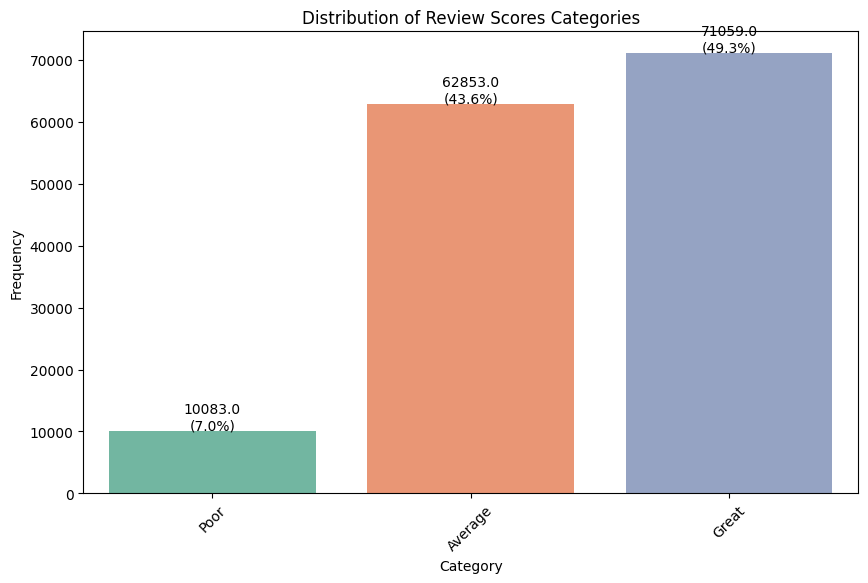

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


# Setting up the figure for plotting
plt.figure(figsize=(10, 6))

# Creating a count plot for the 'target' column
ax = sns.countplot(x='target', data=data, order=['Poor', 'Average', 'Great'], palette='Set2')

# Calculating the total number of non-NaN entries for percentage calculation
total = len(data['target'].dropna())

# Annotating each bar with the count and percentage
for p in ax.patches:
    count = p.get_height()  # The height of the bar is the count of values in this category
    percentage = f'{100 * count / total:.1f}%'  # Calculating the percentage of the total
    ax.annotate(f'{count}\n({percentage})', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

# Setting the title and labels
plt.title('Distribution of Review Scores Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Optional: Rotate the x-axis labels for better readability

# Showing the plot
plt.show()


In [11]:
data_filtered = data[['host_total_listings_count', 'accommodates', 'num_bath', 'bedrooms', 'beds', 'price', 'amenities_count',
                     'essential_amenities', 'host_is_superhost', 'city', 'room_type', 'full_time_host', 'host_verifications_clean', 'target']]

In [12]:
data_filtered

,host_total_listings_count,accommodates,num_bath,bedrooms,beds,price,amenities_count,essential_amenities,host_is_superhost,city,room_type,full_time_host,host_verifications_clean,target
0,3.0,8,3.0,4.0,6.0,500.0,14,3,t,Broward County,Entire home/apt,f,ep,Great
1,12.0,6,2.0,2.0,4.0,186.0,22,4,f,Broward County,Entire home/apt,f,pw,Average
2,20.0,7,2.0,2.0,5.0,297.0,17,3,f,Broward County,Entire home/apt,f,ep,Average
3,5.0,4,1.0,1.0,2.0,162.0,69,5,f,Broward County,Entire home/apt,f,ep,Average
4,17.0,2,1.0,1.0,1.0,92.0,17,4,f,Broward County,Entire home/apt,f,ep,Great
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184979,5358.0,2,1.0,1.0,1.0,95.0,29,5,f,Chicago,Entire home/apt,t,epw,NaN
184980,18.0,2,1.0,2.0,2.0,107.0,4,2,t,Chicago,Entire home/apt,t,ep,NaN
184981,1.0,6,1.0,1.0,1.0,240.0,51,5,f,Chicago,Entire home/apt,f,epw,NaN
184982,97.0,2,1.0,1.0,1.0,95.0,42,5,f,Chicago,Private room,t,epw,NaN


In [8]:
data.isnull().sum()

id                                    0
host_id                               0
host_since                            0
host_location                         0
host_is_superhost                     0
host_listings_count                   0
host_total_listings_count             0
host_has_profile_pic                  0
host_identity_verified                0
neighborhood                          0
latitude                              0
longitude                             0
room_type                             0
accommodates                          0
num_bath                              0
bedrooms                              0
beds                                  0
price                                 0
number_of_reviews                     0
review_scores_value               40989
calculated_host_listings_count        0
city                                  0
amenities_count                       0
neighborhood_city                     0
full_time_host                        0


In [13]:
data_filtered.isnull().sum()

host_total_listings_count        0
accommodates                     0
num_bath                         0
bedrooms                         0
beds                             0
price                            0
amenities_count                  0
essential_amenities              0
host_is_superhost                0
city                             0
room_type                        0
full_time_host                   0
host_verifications_clean         0
target                       40989
dtype: int64

In [14]:
# Save as a new csv file
data_filtered.to_csv('../clean-data/real-final-data.csv', index=False)